In [158]:
import pandas as pd
import numpy as np
import itertools
import math
import matplotlib.pyplot as plt

In [159]:
df = pd.read_csv("Dune_with_Environmentals.csv")
df.head()

,Site,A1,Moisture,Management,Use,Manure,Achimill,Agrostol,Airaprae,Alopgeni,...,Ranuflam,Rumeacet,Sagiproc,Salirepe,Scorautu,Trifprat,Trifrepe,Vicilath,Bracruta,Callcusp
0,1,2.8,1,SF,Haypastu,4,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,3.5,1,BF,Haypastu,2,3,0,0,2,...,0,0,0,0,5,0,5,0,0,0
2,3,4.3,2,SF,Haypastu,4,0,4,0,7,...,0,0,0,0,2,0,2,0,2,0
3,4,4.2,2,SF,Haypastu,4,0,8,0,2,...,0,0,5,0,2,0,1,0,2,0
4,5,6.3,1,HF,Hayfield,2,2,0,0,0,...,0,5,0,0,3,2,2,0,2,0


In [160]:
mapper = { "Hayfield":0 ,"Haypastu":1, "Pasture":2}
# replacing  with the new categorical approach
df["Use"] = df["Use"].replace(mapper)
df.head()

,Site,A1,Moisture,Management,Use,Manure,Achimill,Agrostol,Airaprae,Alopgeni,...,Ranuflam,Rumeacet,Sagiproc,Salirepe,Scorautu,Trifprat,Trifrepe,Vicilath,Bracruta,Callcusp
0,1,2.8,1,SF,1,4,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,3.5,1,BF,1,2,3,0,0,2,...,0,0,0,0,5,0,5,0,0,0
2,3,4.3,2,SF,1,4,0,4,0,7,...,0,0,0,0,2,0,2,0,2,0
3,4,4.2,2,SF,1,4,0,8,0,2,...,0,0,5,0,2,0,1,0,2,0
4,5,6.3,1,HF,0,2,2,0,0,0,...,0,5,0,0,3,2,2,0,2,0


In [161]:
y = pd.get_dummies(df.Management, prefix='Management')
print(y.head())

   Management_BF  Management_HF  Management_NM  Management_SF
0              0              0              0              1
1              1              0              0              0
2              0              0              0              1
3              0              0              0              1
4              0              1              0              0


In [162]:
sites = pd.concat([df, y], axis=1, join='inner')
sites = sites.drop("Management", axis =1)
sites.head()

,Site,A1,Moisture,Use,Manure,Achimill,Agrostol,Airaprae,Alopgeni,Anthodor,...,Scorautu,Trifprat,Trifrepe,Vicilath,Bracruta,Callcusp,Management_BF,Management_HF,Management_NM,Management_SF
0,1,2.8,1,1,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,3.5,1,1,2,3,0,0,2,0,...,5,0,5,0,0,0,1,0,0,0
2,3,4.3,2,1,4,0,4,0,7,0,...,2,0,2,0,2,0,0,0,0,1
3,4,4.2,2,1,4,0,8,0,2,0,...,2,0,1,0,2,0,0,0,0,1
4,5,6.3,1,0,2,2,0,0,0,4,...,3,2,2,0,2,0,0,1,0,0


In [163]:
species = df.loc[:,'Achimill':'Callcusp']
species.head()

,Achimill,Agrostol,Airaprae,Alopgeni,Anthodor,Bellpere,Bromhord,Chenalbu,Cirsarve,Comapalu,...,Ranuflam,Rumeacet,Sagiproc,Salirepe,Scorautu,Trifprat,Trifrepe,Vicilath,Bracruta,Callcusp
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,0,0,2,0,3,4,0,0,0,...,0,0,0,0,5,0,5,0,0,0
2,0,4,0,7,0,2,0,0,0,0,...,0,0,0,0,2,0,2,0,2,0
3,0,8,0,2,0,2,3,0,2,0,...,0,0,5,0,2,0,1,0,2,0
4,2,0,0,0,4,2,2,0,0,0,...,0,5,0,0,3,2,2,0,2,0


In [164]:
# distance measure
def bray_curtis(a,b):
    c  = np.minimum(a,b).sum()
    s1 = a.sum()
    s2 = b.sum()
    return (1 - 2*c/(s1+s2))


In [165]:
# btw is to select between what to find the distances, options - rows / cols
def apply_bc(data, btw = "rows" ):
    data = np.array(data)
    if btw is "cols":
        data = data.T
        
    pairs = list(itertools.product(data, repeat=2))
    #print(len(col_pairs))
    dis = np.zeros((len(pairs),1))
    for i in range(len(pairs)):
        dis[i] = bray_curtis(pairs[i][0], pairs[i][1])
    #s = int(math.sqrt(len(col_pairs)))
    s = data.shape[0]
    dis = dis.reshape((s,s))
    return dis


In [166]:
# def mds(D, k):
#     '''
#     inputs: 
#       - D: Distance matrix
#       - k: positive integer, k<=n
#     returns:
#       X: n-by-k matrix whose rows are data points
#     '''
#     D_sqaured = D*D
#     n = D.shape[0]
    
#     #doubly center
#     sum_r = np.sum(D_sqaured, axis=0)
#     sum_c = (np.sum(D_sqaured, axis=1))[:, np.newaxis]
#     sum_all = sum_r.sum()

#     B = D_sqaured - (sum_r/n) - (sum_c/n) + (sum_all/(n*n))
#     B = B/-2

#     eig_val, eig_vec = np.linalg.eigh(B)
#     #print("vec",eig_vec)

#     #flipping matrices to get in descending order
#     eig_val_f = np.flip(eig_val)
#     eig_vec_f = np.flip(eig_vec, axis = 1)

#     k_val = eig_val_f[0:k]
#     k_vec = eig_vec_f[:, 0:k]
#     #print("kval", k_val)

#     s = np.zeros((k,k))
#     np.fill_diagonal(s, k_val)
    
#     #print(s)
#     s_sqrt = np.sqrt(s)
#     X = np.dot(k_vec, s_sqrt)

#     #print(X)
#     return X

def mds(D, k):
    '''
    inputs: 
      - D: n-by-n Euclidian distance matrix
      - k: positive integer, k<=n
    returns:
      X: n-by-k matrix whose rows are data points
    '''
    D_sqaured = D * D
    n = D.shape[0]
    C = np.eye(n) - np.ones((n, n)) / n
    B = -0.5 * C @ D_sqaured @ C

    w, v = np.linalg.eigh(B)
    E_k, lam_k = v[:, -k:], np.diag(w[-k:])
    X = E_k @ np.sqrt(lam_k)
    return X

In [190]:
def plot(data, label, title, img_name):
    data = np.array(data)
    fig, ax = plt.subplots(1,1, figsize=(14,10))
    #ax = plt.axes(projection ="2d")
    scat = ax.scatter(data[:,0], data[:,1], c="red")
    for i, txt in enumerate(label):
        ax.annotate(txt, (data[i,0], data[i,1]), xytext = (data[i,0]-0.01, data[i,1]+0.01), fontsize = 15)
    ax.set_xlabel("Dimension 1", fontsize = 20)
    ax.set_ylabel("Dimension 2", fontsize = 20)
    ax.set_title(title, fontsize = 22)
    plt.savefig(img_name)
    plt.show()

### Site-to-Site or row-to-row 

In [191]:
D = apply_bc(sites, btw = "rows")
print(D.shape)
sites_2 = mds(D,2)
#print(reduced_data.shape)
# if between rows
sites_2 = pd.DataFrame(sites_2.T , columns= np.arange(1,21) )
sites_2.head()

(20, 20)


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,0.098027,-0.001764,0.215411,0.196756,-0.144118,-0.179489,-0.112855,0.203460,0.142527,-0.199653,-0.172605,0.157934,0.204695,0.067144,0.078863,0.227989,-0.319210,-0.261826,-0.236175,0.034889
1,-0.422162,-0.378479,-0.248267,-0.228956,-0.248146,-0.211799,-0.258306,0.012488,-0.056112,-0.170471,-0.055534,0.112180,0.102873,0.334477,0.371320,0.283705,0.216897,0.124733,0.296086,0.423473


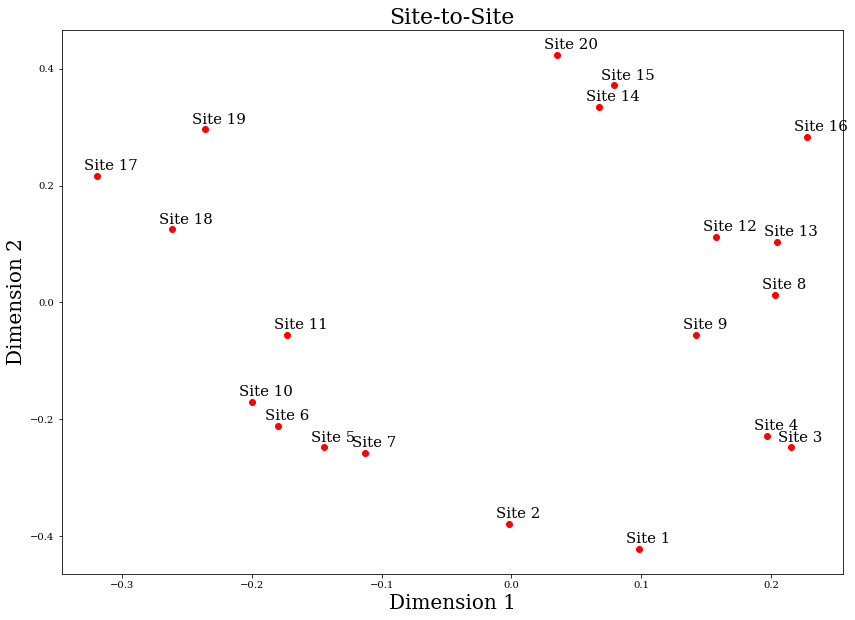

In [192]:
num =  [str(x) for x in np.arange(1,21)]
lbl1 = ["Site " + i for i in num ]
plot(sites_2.T, lbl1, "Site-to-Site", "2d_plots/si2si.png")

### Species-to-Species or col-to-col

In [193]:
D = apply_bc(species, btw = "cols")
#print(D.shape)
species_2 = mds(D,2)
#print(reduced_data.shape)
# if between cols
species_2 = pd.DataFrame(species_2.T, columns = species.columns)
species_2.head()

,Achimill,Agrostol,Airaprae,Alopgeni,Anthodor,Bellpere,Bromhord,Chenalbu,Cirsarve,Comapalu,...,Ranuflam,Rumeacet,Sagiproc,Salirepe,Scorautu,Trifprat,Trifrepe,Vicilath,Bracruta,Callcusp
0,0.069552,-0.341876,0.611271,-0.364477,0.289621,-0.062865,-0.090807,0.104555,0.037610,0.042441,...,-0.111332,-0.099894,-0.006654,0.363095,-0.073305,0.028171,-0.154718,0.247127,-0.119949,-0.017849
1,-0.429846,0.349175,0.070248,0.145946,-0.348085,-0.284051,-0.380663,0.147931,0.029028,0.364483,...,0.539781,-0.307092,0.099228,0.288623,-0.111301,-0.344370,-0.158499,-0.034304,0.012160,0.505971


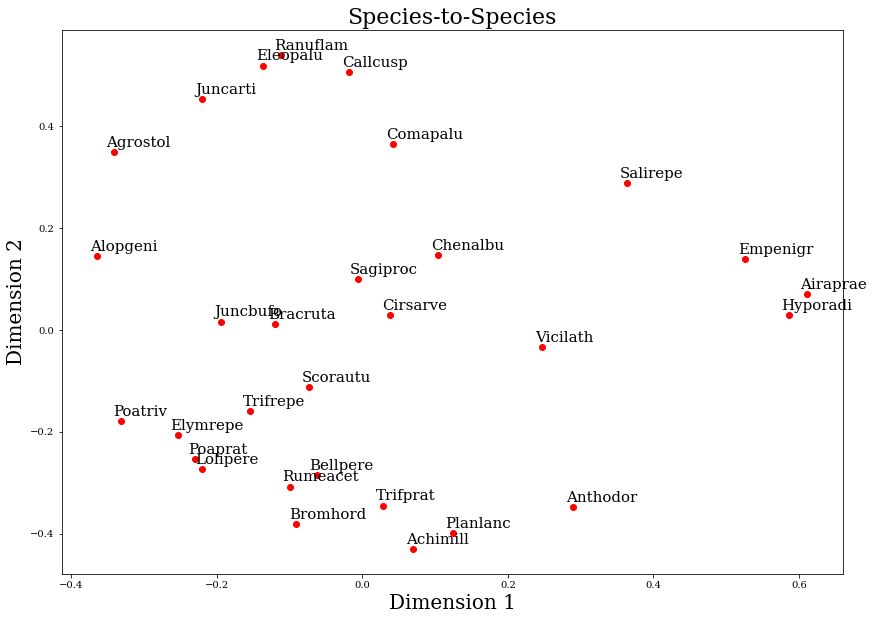

In [194]:
lbl2 = species.columns
plot(species_2.T, lbl2, "Species-to-Species", "2d_plots/sp2sp.png")